In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [4]:
# Load dataset
with np.load("../data/mnist.npz") as data:
    x_train_raw, y_train = data["x_train"], data["y_train"]
    x_test_raw, y_test = data["x_test"], data["y_test"]

# Preprocess for training
x_train = x_train_raw.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test_raw.reshape(-1, 784).astype("float32") / 255.0

# Build Mode
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\Sazgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


این قسمت را اجرا نکنید 
 اگر مایل به یادگیری دوباره مدل هستید این قسمت را اجرا کنید

In [ ]:
# Train
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluat
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", acc)

# Save model
model.save("../models/DENS.h5")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8745 - loss: 0.4367 - val_accuracy: 0.9677 - val_loss: 0.1111
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9620 - loss: 0.1200 - val_accuracy: 0.9722 - val_loss: 0.0954
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9771 - loss: 0.0724 - val_accuracy: 0.9752 - val_loss: 0.0874
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0536 - val_accuracy: 0.9782 - val_loss: 0.0796
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9868 - loss: 0.0410 - val_accuracy: 0.9753 - val_loss: 0.0890


Test accuracy: 0.9728000164031982


In [ ]:
# Load model
model = load_model("../models/mnist_model.h5")

def show(image):
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.show()
    
def predict_images(model, images):
    if images.ndim == 2:
        images = np.expand_dims(images, 0)

    imgs = images.reshape(-1, 784).astype("float32") / 255.0
    preds = model.predict(imgs)

    for img, pred in zip(images, preds):
        plt.imshow(img, cmap="gray")
        plt.title(f"Predicted: {np.argmax(pred)}")
        plt.axis("off")
        plt.show()

یک عدد از خود دیتا بیس انتخاب کنید

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


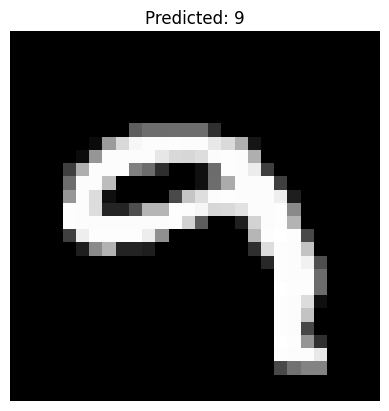

In [7]:
# Test with random sampl
sample_image = x_train_raw[np.random.randint(0, 60000)]
predict_images(model, sample_image)

حالا میریم سراغ تست با دیتای واقعی که خودمون بهش میدیم

In [8]:
import numpy as np
from PIL import Image

def image_to_mnist(image_path):
    # 1️⃣ Load
    img = Image.open(image_path)
    
    # 2️⃣ Grayscale
    img = img.convert("L")
    
    # 3️⃣ Resize
    img = img.resize((28, 28))
    
    # 4️⃣ To numpy
    img_array = np.array(img).astype(np.float32)
    
    # 5️⃣ Normalize
    img_array /= 255.0
    # 6️⃣ Invert (برای تطبیق با MNIST)
    img_array = 1.0 - img_array
    
    return (img_array * 255).astype('uint8')

 مسیر یک عکس رو بدین تا پیش بینی کنه

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


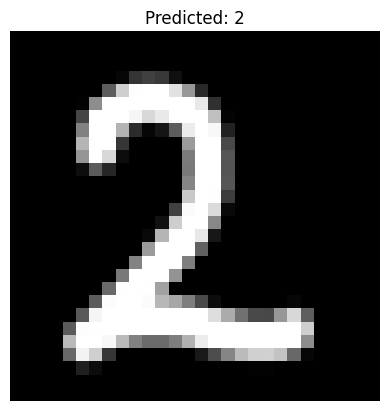

In [9]:
image = image_to_mnist("../image/2.png")
predict_images(model, image)

یا اینکه خودتون عدد رو بنویسید

In [1]:
import cv2
import numpy as np

drawing = False
ix, iy = -1, -1

# Canvas بزرگ برای راحتی کاربر
canvas = np.zeros((280, 280), dtype=np.uint8)

# تابع موس
def draw_number(event, x, y, flags, param):
    global ix, iy, drawing, canvas
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(canvas, (x, y), 12, (255,), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.circle(canvas, (x, y), 12, (255,), -1)

cv2.namedWindow('Draw a digit')
cv2.setMouseCallback('Draw a digit', draw_number)

print("Press Enter to sava:")

while True:
    cv2.imshow('Draw a digit', canvas)
    key = cv2.waitKey(1) & 0xFF
    if key == 13:  # Enter
        break

# dilate برای ضخیم‌تر کردن خطوط و جلوگیری از ناپدید شدن pixel
kernel = np.ones((3,3), np.uint8)
canvas_dilated = cv2.dilate(canvas, kernel, iterations=1)

# resize به 28x28 و حفظ uint8
digit_img = cv2.resize(canvas_dilated, (28, 28), interpolation=cv2.INTER_AREA)
digit_img = digit_img.astype(np.uint8)  # خروجی نهایی دقیقاً uint8

cv2.imshow('Digit 28x28', digit_img)
cv2.waitKey(1000)
cv2.destroyAllWindows()

print("image is ready: shape =", digit_img.shape, "dtype =", digit_img.dtype)
predict_images(model, digit_img)


Press Enter to sava:
image is ready: shape = (28, 28) dtype = uint8


NameError: name 'predict_images' is not defined